In [8]:
!pip install mlxtend

In [23]:
import pandas as pd
df = pd.read_csv('/content/Customer Preference Survey.csv')
df.head()

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


# Cleansing data

In [24]:
#clean df
df=df.fillna(0)
import numpy as np
column_list = df.columns.tolist()
for c in column_list:
    df[c]= np.where(df[c].str.contains('ไม่เคย'),0,1)
df["sum"] = df.sum(axis=1)
df=df[df['sum']!=0]
hot_encoded_df=df.drop(columns=['Timestamp','sum'])
hot_encoded_df.head()

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0


# Association rule

In [25]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.1, use_colnames=True)

In [26]:
frequent_itemsets

,support,itemsets
0,0.127660,(เครื่องอบผ้า)
1,0.340426,(เครื่องชงกาแฟแคปซูล)
2,0.276596,(บัตตาเลี่ยน)
3,0.702128,(แก้วเก็บความเย็น)
4,0.170213,(ลู่วิ่งออกกำลังกาย)
...,...,...
21378,0.106383,"(ยาดม, airpods , เครื่องซักผ้า, Bluetooth Spea..."
21379,0.106383,"(ยาดม, airpods , เครื่องซักผ้า, Bluetooth Spea..."
21380,0.106383,"(ยาดม, airpods , เครื่องซักผ้า, Bluetooth Spea..."
21381,0.106383,"(แก้วเก็บความเย็น, ยาดม, airpods , เครื่องซักผ..."


In [27]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(เครื่องอบผ้า),(แก้วเก็บความเย็น),0.127660,0.702128,0.127660,1.000000,1.424242,0.038026,inf
1,(แก้วเก็บความเย็น),(เครื่องอบผ้า),0.702128,0.127660,0.127660,0.181818,1.424242,0.038026,1.066194
2,(เครื่องอบผ้า),(เครื่องซักผ้า),0.127660,0.510638,0.127660,1.000000,1.958333,0.062472,inf
3,(เครื่องซักผ้า),(เครื่องอบผ้า),0.510638,0.127660,0.127660,0.250000,1.958333,0.062472,1.163121
4,(เครื่องอบผ้า),(Bluetooth Speaker),0.127660,0.723404,0.106383,0.833333,1.151961,0.014033,1.659574
5,(Bluetooth Speaker),(เครื่องอบผ้า),0.723404,0.127660,0.106383,0.147059,1.151961,0.014033,1.022744
6,(เครื่องอบผ้า),(ห้องน้ำแมวอัตโนมัติ),0.127660,0.978723,0.127660,1.000000,1.021739,0.002716,inf
7,(ห้องน้ำแมวอัตโนมัติ),(เครื่องอบผ้า),0.978723,0.127660,0.127660,0.130435,1.021739,0.002716,1.003191
8,(เครื่องอบผ้า),(กระติกน้ำ 2 ลิตร),0.127660,0.212766,0.106383,0.833333,3.916667,0.079221,4.723404
9,(กระติกน้ำ 2 ลิตร),(เครื่องอบผ้า),0.212766,0.127660,0.106383,0.500000,3.916667,0.079221,1.744681


In [42]:
pct=[20,30,40,50,60,70,80,90]
lift={}
confidence={}
for p in pct:
    lift[p]=np.percentile(np.array(rules['lift']),p)
    confidence[p]=np.percentile(np.array(rules['confidence']),p)

In [46]:
lift[80]

3.1333333333333333

In [47]:
confidence[80]

0.8333333333333334

In [ ]:
rules['len_left']=[len(x) for x in rules['antecedents']]
rules['len_right']=[len(x) for x in rules['consequents']]

In [85]:
select_rules =  rules[ (rules['lift'] >= lift[80]) &
                        (rules['confidence'] >= confidence[70]) &
                        (rules['confidence'] < 1) &
                        # (rules['support']>= 0.11) &
                        (rules['len_left']<= 1) &
                        (rules['len_right']<= 2)
                    ]
select_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,len_left,len_right
8,(เครื่องอบผ้า),(กระติกน้ำ 2 ลิตร),0.12766,0.212766,0.106383,0.833333,3.916667,0.079221,4.723404,1,1
267,(ทรายแมว),(น้ำพุแมว),0.12766,0.106383,0.106383,0.833333,7.833333,0.092802,5.361702,1,1
469,(เครื่องอบผ้า),"(แก้วเก็บความเย็น, กระติกน้ำ 2 ลิตร)",0.12766,0.212766,0.106383,0.833333,3.916667,0.079221,4.723404,1,2
505,(เครื่องอบผ้า),"(กระติกน้ำ 2 ลิตร, เครื่องซักผ้า)",0.12766,0.191489,0.106383,0.833333,4.351852,0.081938,4.851064,1,2
541,(เครื่องอบผ้า),"(กระติกน้ำ 2 ลิตร, ห้องน้ำแมวอัตโนมัติ)",0.12766,0.212766,0.106383,0.833333,3.916667,0.079221,4.723404,1,2
565,(เครื่องอบผ้า),"(กระติกน้ำ 2 ลิตร, พลาสเตอร์บรรเทาปวด ตราเสือ)",0.12766,0.191489,0.106383,0.833333,4.351852,0.081938,4.851064,1,2
571,(เครื่องอบผ้า),"(Salmon Sashimi, กระติกน้ำ 2 ลิตร)",0.12766,0.212766,0.106383,0.833333,3.916667,0.079221,4.723404,1,2
577,(เครื่องอบผ้า),"(ยาดม, กระติกน้ำ 2 ลิตร)",0.12766,0.191489,0.106383,0.833333,4.351852,0.081938,4.851064,1,2
686,(Logitech Mx Master 3 Mouse),"(เครื่องชงกาแฟแคปซูล, เครื่องซักผ้า)",0.12766,0.212766,0.106383,0.833333,3.916667,0.079221,4.723404,1,2
882,(Logitech Mx Master 3 Mouse),"(เครื่องชงกาแฟแคปซูล, External Harddisk)",0.12766,0.255319,0.106383,0.833333,3.263889,0.073789,4.468085,1,2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s

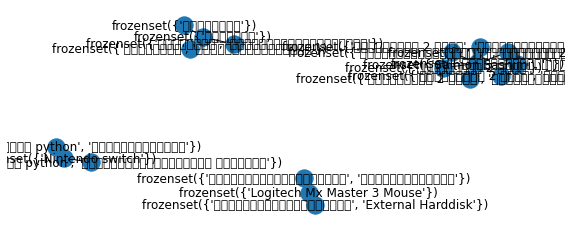

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(select_rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [83]:
select_rules['antecedents'].unique().tolist()

[frozenset({'เครื่องอบผ้า'}),
 frozenset({'ทรายแมว'}),
 frozenset({'Logitech Mx Master 3 Mouse'}),
 frozenset({'Nintendo switch'})]

## สรุป rules
ที่เลือกจำนวน item ของ antecedents เป็น 1 เนื่องจากในชีวิตจริง item ที่หยิบใส่ตะกร้าจะค่อยๆเกิดขึ้นทีละ item หากพิจารณาดังนั้น โอกาสที่จะได้ใช้ antecedents ที่มีจำนวน item ยาวๆจะมีน้อยมาก

ส่งผลให้ antecedents เหลือเพียง เครื่องอบผ้า, ทรายแมว, Logitech Mx Master 3 Mouse และ Nintendo switch เท่านั้น

สำหรับ rules ที่ confidence = 1 เมื่อพิจารณา item แล้วคือ ทรายแมวกับน้ำพุแมว ซึ่งสามารถพิจารณาแนะนำได้โดยไม่ต้องอาศัย rules

# Collaborative filtering

In [ ]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)
item_item_matrix.head()

In [79]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [80]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [81]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3655 missing from current font.
  font.set_text(s

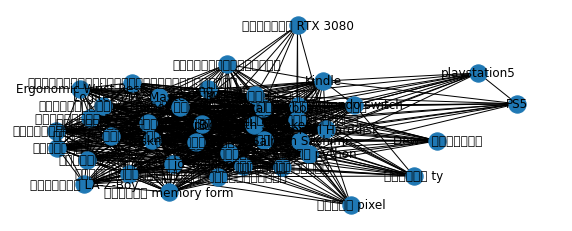

In [82]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()